In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input

# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [2]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################
(x_train, y_train), (x_val, y_val) = keras.datasets.cifar10.load_data()

##################################################

print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

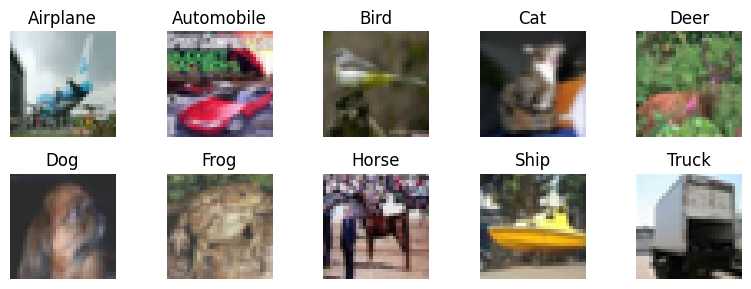

In [ ]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index] # examples for each class
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [3]:
##################################################
################### YOUR CODES ###################

# Normalize pixel values
x_train = x_train / 255.0
# x_train = x_train.astype("float32") / 255
x_val = x_val / 255.0

# Convert labels to one-hot vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

##################################################

# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [8]:
##################################################
################### YOUR CODES ###################
input_shape=(32, 32, 3)

# Define a simple convolutional network
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(units=100, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(units=40, activation="relu"),
        layers.BatchNormalization(synchronized=True),
        layers.Dense(num_classes, activation="softmax"),
    ], name="simple_model"
)
# ---------------------------------------
# model = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(num_classes, activation='softmax')
# ], name="simple_model")
# ----------------------------------------
# model = keras.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(num_classes, activation='softmax')
# ])

##################################################

model.summary()

Model: "simple_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_1 (Dense)             (None, 100)              

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [9]:
##################################################
################### YOUR CODES ###################
# model.compile(...................................)
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


##################################################

Train your model for `10 epochs` and proper `batch_size`.

In [10]:
##################################################
################### YOUR CODES ###################
# history = model.fit(.............................)

# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val), shuffle=True)


##################################################

Epoch 1/10
391/391 [==============================] - 6s 8ms/step - loss: 1.6751 - accuracy: 0.3927 - val_loss: 1.5921 - val_accuracy: 0.4998
Epoch 2/10
391/391 [==============================] - 3s 8ms/step - loss: 1.2913 - accuracy: 0.5366 - val_loss: 1.1107 - val_accuracy: 0.6059
Epoch 3/10
391/391 [==============================] - 3s 8ms/step - loss: 1.1502 - accuracy: 0.5913 - val_loss: 1.0489 - val_accuracy: 0.6314
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0593 - accuracy: 0.6264 - val_loss: 0.9819 - val_accuracy: 0.6581
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 0.9992 - accuracy: 0.6470 - val_loss: 0.9229 - val_accuracy: 0.6741
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.9503 - accuracy: 0.6653 - val_loss: 0.9453 - val_accuracy: 0.6669
Epoch 7/10
391/391 [==============================] - 3s 9ms/step - loss: 0.9182 - accuracy: 0.6764 - val_loss: 0.9320 - val_accuracy: 0.6742
Epoch 

This function plots the `loss` and `accuracy` of your model by the model's history.

In [5]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

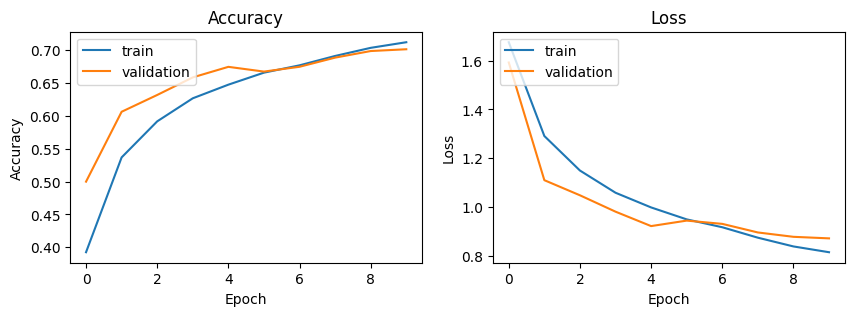

In [12]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [24]:
##################################################
################### YOUR CODES ###################

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# Train the model with data augmentation
datagen = ImageDataGenerator(
    rotation_range=30, # Rotate the image randomly up to 30 degrees
    width_shift_range=0.07, # Shift the image horizontally up to 7%
    height_shift_range=0.07, # Shift the image vertically up to 7%
    shear_range=0.05,  # Shear the image up to 5%
    zoom_range=0.08,  # Zoom the image up to 8%
    horizontal_flip=True, # Flip the image horizontally
    # rescale=1./255 # Rescale the image by normalzing it
)
datagen.fit(x_train)

# see the datagen shape
# for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=10000):
#     print(x_batch.shape, y_batch.shape)
#     break

##################################################

In [25]:
##################################################
################### YOUR CODES ###################
# data_augmentation = tf.keras.Sequential([
#   layers.RandomFlip("horizontal_and_vertical"),
#   layers.RandomRotation(0.4),
#   layers.RandomZoom(0.2),
#   layers.RandomContrast(0.2),
#   # layers.RandomCrop(32, 32)
# ])
# augmented_model = keras.Sequential(
#     [
#         keras.Input(shape=input_shape),
#         data_augmentation,
#         layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
#         layers.MaxPooling2D(pool_size=(2, 2)),
#         layers.Flatten(),
#         layers.Dense(units=100, activation="relu"),
#         layers.Dropout(0.5),
#         layers.Dense(units=40, activation="relu"),
#         layers.BatchNormalization(synchronized=True),
#         layers.Dense(num_classes, activation="softmax"),
#     ], name="augmented_model"
# )

# --------------------------------------------------

augmented_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(units=100, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(units=40, activation="relu"),
        layers.BatchNormalization(synchronized=True),
        layers.Dense(num_classes, activation="softmax"),
    ], name="augmented_model"
)


augmented_model.summary()

# Compile the model
augmented_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##################################################

Model: "augmented_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_22 (Dense)            (None, 100)           

In [26]:
##################################################
################### YOUR CODES ###################

# Train the model

# augmented_history = augmented_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val), shuffle=True)

# ---------------------------------------------------------------------------

augmented_history = augmented_model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data=(x_val, y_val), shuffle=True)


##################################################

Epoch 1/10
391/391 [==============================] - 37s 86ms/step - loss: 1.8143 - accuracy: 0.3313 - val_loss: 1.7482 - val_accuracy: 0.4338
Epoch 2/10
391/391 [==============================] - 33s 84ms/step - loss: 1.5120 - accuracy: 0.4488 - val_loss: 1.3026 - val_accuracy: 0.5363
Epoch 3/10
391/391 [==============================] - 33s 85ms/step - loss: 1.4172 - accuracy: 0.4881 - val_loss: 1.2076 - val_accuracy: 0.5698
Epoch 4/10
391/391 [==============================] - 35s 89ms/step - loss: 1.3627 - accuracy: 0.5107 - val_loss: 1.2943 - val_accuracy: 0.5426
Epoch 5/10
391/391 [==============================] - 42s 106ms/step - loss: 1.3225 - accuracy: 0.5268 - val_loss: 1.1677 - val_accuracy: 0.5852
Epoch 6/10
391/391 [==============================] - 33s 83ms/step - loss: 1.2968 - accuracy: 0.5387 - val_loss: 1.2817 - val_accuracy: 0.5688
Epoch 7/10
391/391 [==============================] - 32s 81ms/step - loss: 1.2576 - accuracy: 0.5532 - val_loss: 1.1697 - val_accuracy

Let's see your model performance with augmentation.

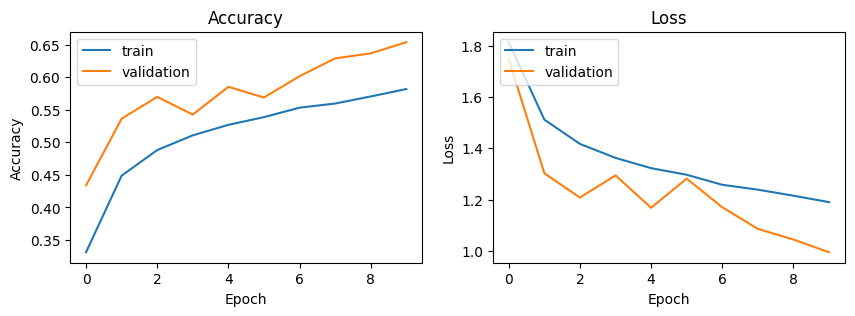

In [27]:
plot_acc_loss(augmented_history)

Compare results and analyze underfitting/overfitting

ج) نتایج و نمودارهای قسمتهای الف و ب را با یکدیگر مقایسه و از نظر  underfittingو  overfittingتحلیل کنید.

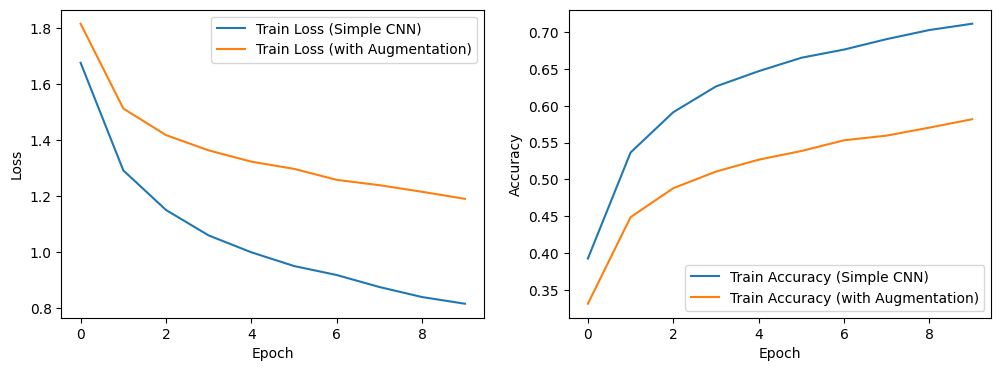

In [28]:
# Compare results and analyze underfitting/overfitting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (Simple CNN)')
plt.plot(augmented_history.history['loss'], label='Train Loss (with Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy (Simple CNN)')
plt.plot(augmented_history.history['accuracy'], label='Train Accuracy (with Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

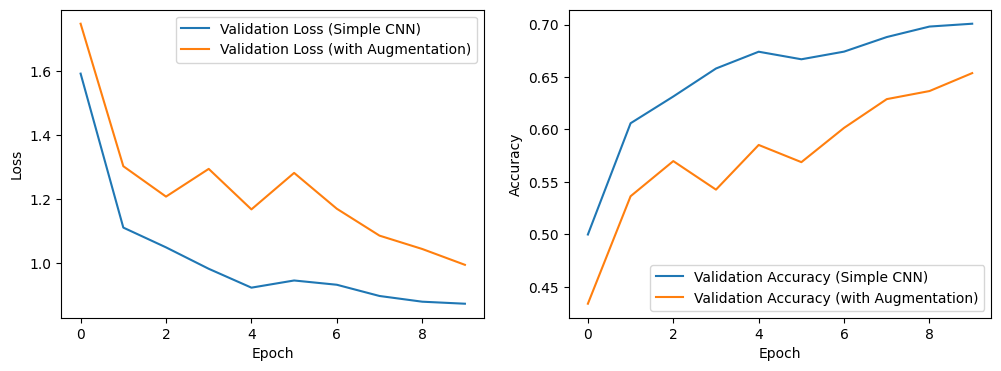

In [29]:
# Compare results and analyze underfitting/overfitting
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_loss'], label='Validation Loss (Simple CNN)')
plt.plot(augmented_history.history['val_loss'], label='Validation Loss (with Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (Simple CNN)')
plt.plot(augmented_history.history['val_accuracy'], label='Validation Accuracy (with Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

In [11]:
# Use pre-trained ResNet50 model with transfer learning

# Create the base model from the pre-trained model ResNet50
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the base_model
base_model.trainable = False

Epoch 1/10
782/782 [==============================] - 190s 234ms/step - loss: 2.2075 - accuracy: 0.1761 - val_loss: 2.0912 - val_accuracy: 0.2153
Epoch 2/10
782/782 [==============================] - 181s 232ms/step - loss: 2.0312 - accuracy: 0.2384 - val_loss: 2.0554 - val_accuracy: 0.2275
Epoch 3/10
782/782 [==============================] - 182s 233ms/step - loss: 1.9693 - accuracy: 0.2664 - val_loss: 1.9838 - val_accuracy: 0.2669
Epoch 4/10
782/782 [==============================] - 182s 233ms/step - loss: 1.9249 - accuracy: 0.2836 - val_loss: 1.9228 - val_accuracy: 0.2755
Epoch 5/10
782/782 [==============================] - 168s 215ms/step - loss: 1.8925 - accuracy: 0.2998 - val_loss: 1.8767 - val_accuracy: 0.3006
Epoch 6/10
782/782 [==============================] - 181s 232ms/step - loss: 1.8641 - accuracy: 0.3119 - val_loss: 1.9608 - val_accuracy: 0.3069
Epoch 7/10
782/782 [==============================] - 181s 232ms/step - loss: 1.8356 - accuracy: 0.3239 - val_loss: 1.7971 -

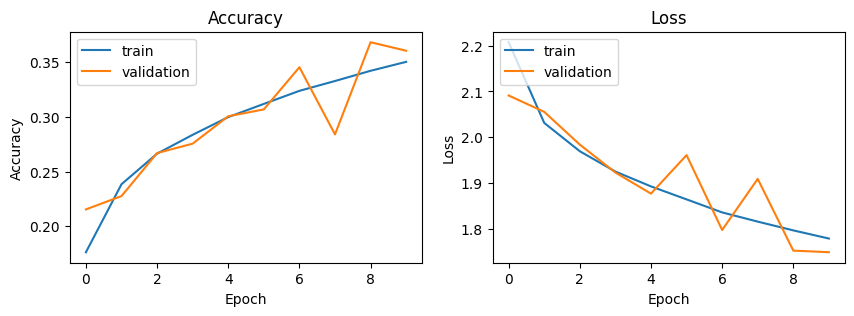

In [ ]:
transfered_model = keras.Sequential([
    tf.keras.layers.Resizing(224, 224), # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Resizing
    base_model,

    layers.GlobalAveragePooling2D(), # Convert features of shape `base_model.output_shape[1:]` to vectors
    layers.Dense(1024, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),

    # layers.MaxPooling2D(pool_size=(2, 2)),
    # layers.Flatten(),
    # layers.Dense(units=100, activation="relu"),
    # layers.Dropout(0.5),
    # layers.Dense(units=40, activation="relu"),
    # layers.BatchNormalization(synchronized=True),
    # layers.Dense(num_classes, activation="softmax"),
])

# transfered_model.summary()

# Compile the model
transfered_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model
transfered_history = transfered_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

## Preprocess images
## x_train_transfer = preprocess_input(x_train)
## x_val_transfer = preprocess_input(x_val)
## transfered_history = transfered_model.fit(x_train_transfer, y_train, batch_size=64, epochs=10, validation_data=(x_val_transfer, y_val))

# Plot the loss and accuracy graphs for transfer learning
plot_acc_loss(transfered_history)


## Use only the first three blocks (`extra bonus`)

conv3_block4_out
Epoch 1/10
391/391 [==============================] - 7s 13ms/step - loss: 2.3122 - accuracy: 0.1434 - val_loss: 2.2256 - val_accuracy: 0.1544
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 2.1111 - accuracy: 0.2257 - val_loss: 2.0194 - val_accuracy: 0.2767
Epoch 3/10
391/391 [==============================] - 4s 11ms/step - loss: 1.9981 - accuracy: 0.2669 - val_loss: 2.0010 - val_accuracy: 0.2726
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 1.9380 - accuracy: 0.2948 - val_loss: 1.8497 - val_accuracy: 0.3549
Epoch 5/10
391/391 [==============================] - 4s 10ms/step - loss: 1.8842 - accuracy: 0.3161 - val_loss: 1.8263 - val_accuracy: 0.3551
Epoch 6/10
391/391 [==============================] - 4s 10ms/step - loss: 1.8663 - accuracy: 0.3228 - val_loss: 1.8229 - val_accuracy: 0.3280
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 1.8297 - accuracy: 0.3368 - val_loss: 1.7951 - val

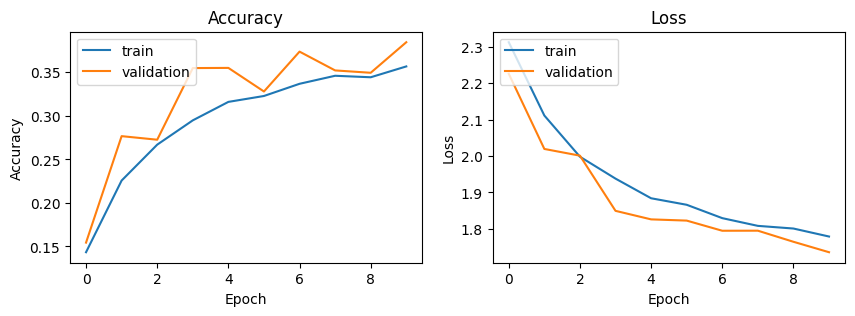

In [ ]:
# Load the ResNet50 model without the top classification layer.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
#  include_top=False  # Do not include the ImageNet classifier at the top.

# Freeze the first three blocks of the ResNet50 model.
for layer in base_model.layers:
    layer.trainable = False
    if 'conv3_block4_out' in layer.name:
        x = layer
        print(layer.name)
        break

# -------------------------------------------
# Add a global spatial average pooling layer.
x = layers.GlobalAveragePooling2D()(x.output) # Convert features of shape `base_model.output_shape[1:]` to vectors

# Add a fully-connected layer.
x = layers.Dense(1024, activation='relu')(x) # or 512

# Add a logistic layer with the number of classes in CIFAR10.
predictions = layers.Dense(num_classes, activation='softmax')(x)

# Create the model.
model = keras.Model(inputs=base_model.input, outputs=predictions)
# ---------------------------------------------
# x = layers.GlobalAveragePooling2D()(x.output)
# # x = layers.MaxPooling2D(pool_size=(2, 2))(x.output)
# # x = layers.Flatten()(x)
# x = layers.Dense(units=512, activation='relu')(x)
# x = layers.Dense(units=100, activation="relu")(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(units=40, activation="relu")(x)
# x = layers.BatchNormalization(synchronized=True)(x)
# predictions = layers.Dense(num_classes, activation="softmax")(x)
# model = keras.Model(inputs=base_model.input, outputs=predictions)
# ---------------------------------------------


# Compile the model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model.
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

# Plot the loss and accuracy graphs for transfer learning
plot_acc_loss(history)